# Unsupervised Learning Exam Prep

### Learning outcomes

*   Recap on Unsupervised Concepts



## Clustering Algorithms

K-means clustering is an iterative algorithm that partitions a dataset into K clusters. The main steps involved in the K-means algorithm are:

1. Randomly initialize K cluster centroids
2. Assign each observation to the nearest centroid
3. Update the cluster centroids based on the assigned observations
4. Repeat steps 2 and 3 until convergence (i.e., when the assignments no longer change or the centroids do not significantly move).

## Evaluation

Within-Cluster Sum of Squares (WCSS), also known as **inertia**. This metric measures the sum of squared distances between each point and its assigned centroid. Lower WCSS values indicate more compact clusters.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

# Compute WCSS for different numbers of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

### Inertia is the WCSS



In [ ]:
print(wcss)

[2812.137595303234, 1190.7823593643448, 546.8911504626299, 212.00599621083484, 188.82985966318432, 170.03997523951085, 152.71693336661792, 136.82425385087726, 124.44701459780677, 112.58738002972927]


### Elbow Method

The Elbow Method is used to determine the optimal number of clusters in K-means clustering.

It involves plotting the WCSS against the number of clusters. The '**elbow**' point on the plot is where the WCSS begins to decrease more slowly, indicating that adding more clusters does not significantly improve the compactness of the clusters.

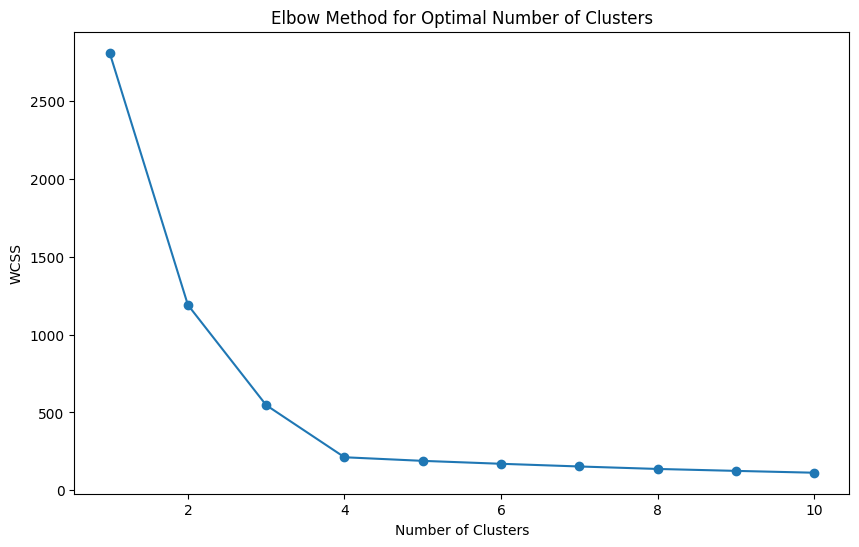

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

## Transformations

Taking Cluster Centers Back to Original Space

**`StandardScaler`** is used to standardize the features before applying K-means clustering

**`inverse_transform`** method of scaler is then used to transform the cluster centres back to the original feature space.


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import numpy as np

# Data
X = np.array([[1, 2], [3, 4], [5, 6], [7, 8], [9, 10]])

# Step 1: Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 2: Apply K-means clustering
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_scaled)

# Step 3: Inverse transform the cluster centers
centers_scaled = kmeans.cluster_centers_
centers_original = scaler.inverse_transform(centers_scaled)

# Print results
print("Original Data:\n", X)
print("\nScaled Data:\n", X_scaled)
print("\nCluster Centers (Scaled):\n", centers_scaled)
print("\nCluster Centers (Original Feature Space):\n", centers_original)

Original Data:
 [[ 1  2]
 [ 3  4]
 [ 5  6]
 [ 7  8]
 [ 9 10]]

Scaled Data:
 [[-1.41421356 -1.41421356]
 [-0.70710678 -0.70710678]
 [ 0.          0.        ]
 [ 0.70710678  0.70710678]
 [ 1.41421356  1.41421356]]

Cluster Centers (Scaled):
 [[ 0.70710678  0.70710678]
 [-1.06066017 -1.06066017]]

Cluster Centers (Original Feature Space):
 [[7. 8.]
 [2. 3.]]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


### Visualising

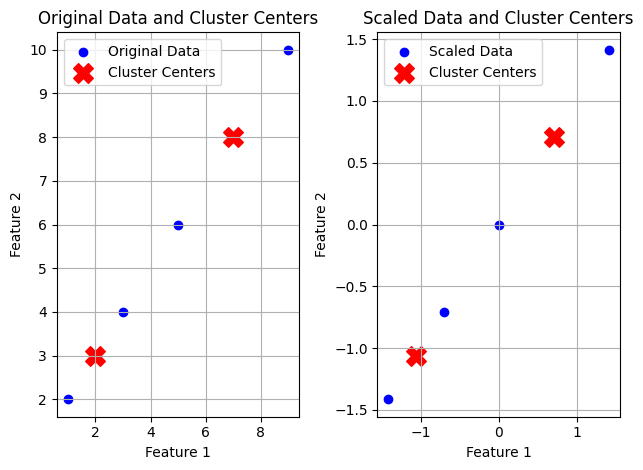

In [ ]:
# Original data and cluster centers in the original space
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c='blue', label='Original Data')
plt.scatter(centers_original[:, 0], centers_original[:, 1], c='red', marker='X', s=200, label='Cluster Centers')
plt.title('Original Data and Cluster Centers')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)

# Scaled data and cluster centers in the scaled space
plt.subplot(1, 2, 2)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c='blue', label='Scaled Data')
plt.scatter(centers_scaled[:, 0], centers_scaled[:, 1], c='red', marker='X', s=200, label='Cluster Centers')
plt.title('Scaled Data and Cluster Centers')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

## Hierarchical Clustering

A method of cluster analysis which seeks to iteratively merging smaller clusters into larger ones (agglomerative approach) or splitting larger clusters into smaller ones (divisive approach).

It produces a dendrogram, a tree-like diagram that illustrates the arrangement of the clusters formed at each step.

Key parameters

* **`linkage`** function is used to perform hierarchical clustering

* **`method`** parameter specifies how the distance between clusters is calculated

* **`metric`** parameter specifies the distance metric

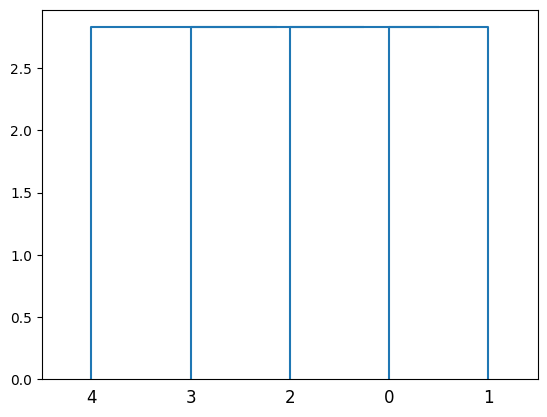

In [ ]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

X = [[1, 2], [3, 4], [5, 6], [7, 8], [9, 10]]
Z = linkage(X, method='single', metric='euclidean')
dendrogram(Z)
plt.show()

### Linkage Methods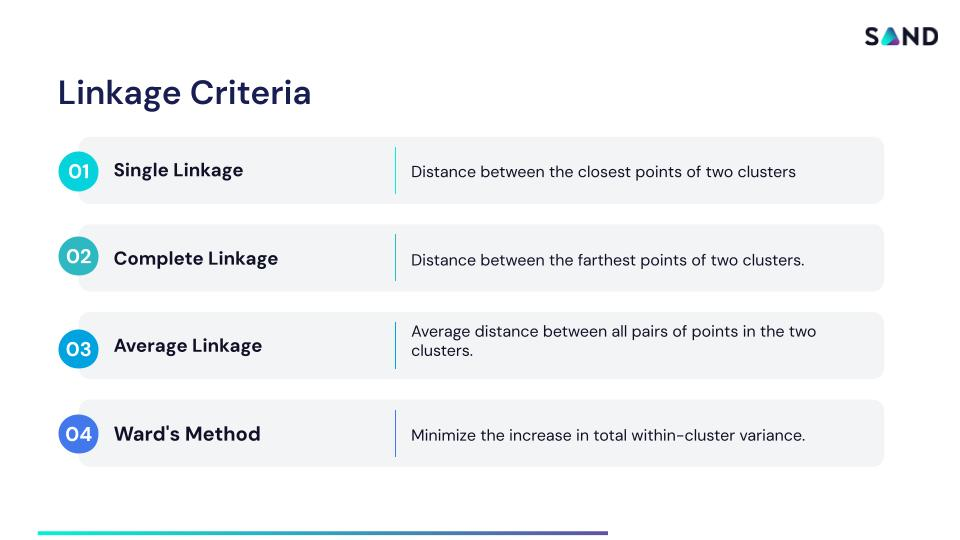

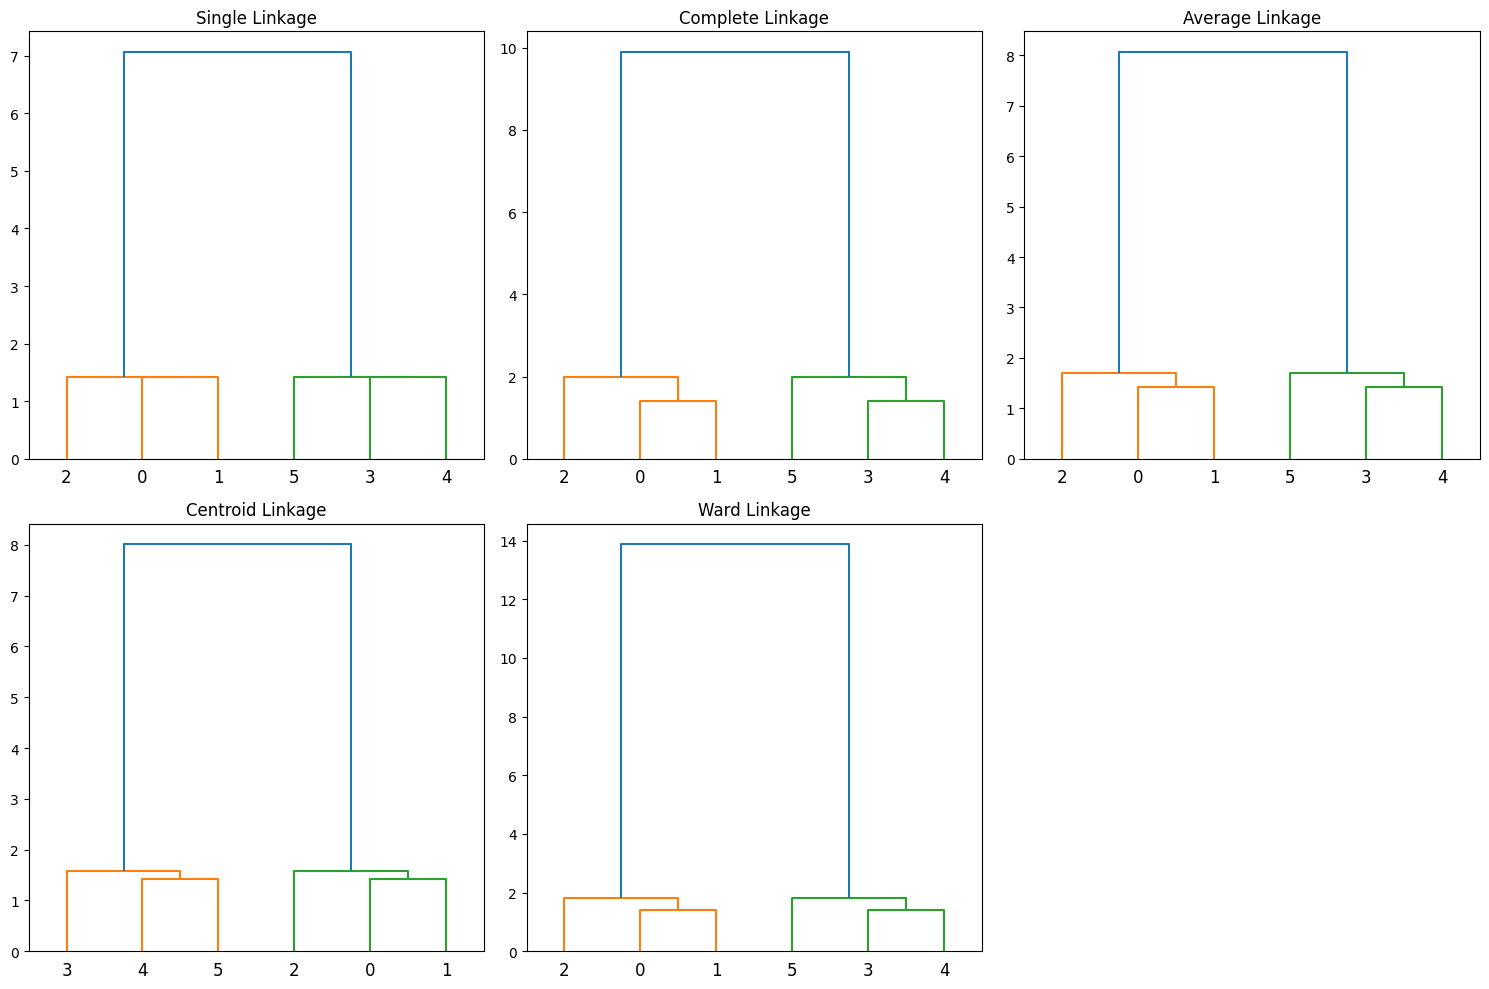

In [ ]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt
import numpy as np

# Data
X = np.array([[1, 2], [2, 3], [3, 2], [8, 7], [7, 8], [8, 9]])

# Perform hierarchical clustering with different linkage methods
linkage_methods = ['single', 'complete', 'average', 'centroid', 'ward']

plt.figure(figsize=(15, 10))

for i, method in enumerate(linkage_methods, 1):
    Z = linkage(X, method=method)
    plt.subplot(2, 3, i)
    dendrogram(Z)
    plt.title(f'{method.capitalize()} Linkage')

plt.tight_layout()
plt.show()

### Cosine Similarity

Calculating user similarity using cosine similarity, it is necessary to transform the user-item interaction matrix such that each user's interactions are represented as a vector.

User-Item Interaction Matrix: Ensure that the matrix is organized where rows represent users and columns represent items. Each entry in the matrix represents the interaction between a user and an item

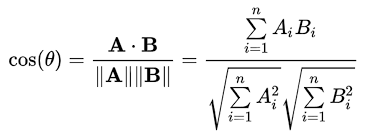

Where:

* 𝑎
⋅
𝑏
a⋅b is the dot product of vectors

*
∥a∥ and
∥b∥ are the magnitudes (or norms) of the vectors
𝑎 and
𝑏



For users represented by vectors
𝑢
1
=
[
4
,
0
,
0
,
5
,
1
]
u
1
​
 =[4,0,0,5,1] and
𝑢
2
=
[
5
,
5
,
4
,
0
,
0
]
u
2
​
 =[5,5,4,0,0], the cosine similarity is calculated as follows:

1. Dot Product:
𝑢
1
⋅
𝑢
2
=
(
4
×
5
)
+
(
0
×
5
)
+
(
0
×
4
)
+
(
5
×
0
)
+
(
1
×
0
)
=
20
u
1
​
 ⋅u
2
​
 =(4×5)+(0×5)+(0×4)+(5×0)+(1×0)=20

2. Magnitude of Vectors:
∥
𝑢
1
∥
=
4
2
+
0
2
+
0
2
+
5
2
+
1
2
=
16
+
25
+
1
=
42
∥u
1
​
 ∥=
4
2
 +0
2
 +0
2
 +5
2
 +1
2

​
 =
16+25+1
​
 =
42
​


∥
𝑢
2
∥
=
5
2
+
5
2
+
4
2
+
0
2
+
0
2
=
25
+
25
+
16
=
66
∥u
2
​
 ∥=
5
2
 +5
2
 +4
2
 +0
2
 +0
2

​
 =
25+25+16
​
 =
66
​

3. Cosine Similarity:
cosine_similarity
(
𝑢
1
,
𝑢
2
)
=
20
42
×
66
cosine_similarity(u
1
​
 ,u
2
​
 )=
42
​
 ×
66
​

20
​


### Standardisation

1. Initialize Scaler: scaler = StandardScaler() initializes the scaler object.

2. Fit and Transform: X_scaled = scaler.fit_transform(X) standardizes the data:

3. Fit: The fit part computes the mean and standard deviation for each feature.

4. Transform: The transform part standardizes the dataset using these statistics.
After this step, X_scaled will have a mean of 0 and a standard deviation of 1 for each feature.

5. Clustering: model = AgglomerativeClustering(n_clusters=2, linkage='average') initializes the clustering model. model.fit(X_scaled) fits the model to the scaled data.

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering

X = [[1, 2], [2, 3], [3, 4], [5, 6], [7, 8]]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

model = AgglomerativeClustering(n_clusters=2, linkage='average')
model.fit(X_scaled)

AgglomerativeClustering(linkage='average')

## How Clustering Works in Geospatial Analysis

* **Spatial Grouping**: Clustering algorithms in geospatial analysis group points together based on their physical proximity in geographic space.

* **Pattern Identification**: They identify clusters or concentrations of points that exhibit similar spatial characteristics, such as density or proximity.

* **Applications**: Used in urban planning, epidemiology, natural resource management, and retail to identify spatial patterns like disease outbreaks, urban development hotspots, or customer clusters for targeted marketing.

### Welcome to GeoPandas

* **DataFrame** is a general-purpose data structure for tabular data handling in pandas.
* **GeoDataFrame** extends DataFrame to support spatial data types and operations, making it suitable for geospatial analysis and integration with GIS workflows.

1. Spatial Data Handling: It can store and manipulate spatial data, such as points, lines, polygons, and multi-geometries (e.g., MultiPoint, MultiPolygon).
3. Geometric Operations: Provides methods for geometric operations like area, distance, buffer, and spatial joins.
4. Integration with GIS: Designed for integration with geographic information system (GIS) tools and libraries (e.g., GeoPandas integrates with libraries like Shapely and Fiona).

## DBSCAN

In [ ]:
from sklearn.cluster import DBSCAN

import numpy as np



coordinates = np.array([

    [37.77, -122.42],

    [37.78, -122.41],

    [37.76, -122.43],

    [37.74, -122.44],

    [37.73, -122.45]

])


db = DBSCAN(eps=0.01, min_samples=2).fit(coordinates)

labels = db.labels_

print(labels)

[-1 -1 -1 -1 -1]


Points are divided into clusters with at least one noise point. This is due to not being close to any core points

## Guassian Models

1. Shape of Gaussian Distribution:

* The covariance matrix determines the shape (elliptical contours) of each Gaussian component in the GMM.
* It specifies how spread out the data points are around the mean of each component along different dimensions (features).
2. Modeling Data Variability:

* Different covariance matrices allow GMM to model clusters with different variances and correlations among features.
* A diagonal covariance matrix assumes that features are independent, while a full covariance matrix captures correlations among features.

Advantages:

1. Flexible Cluster Shapes:

* Can model elliptical clusters
* Handles different orientations and spreads of data

2. Probabilistic Assignment:
* Provides soft clustering with probabilities for each point belonging to multiple clusters
* Useful for overlapping clusters

3. Handling Variability:

* Supports clusters with different variances and covariances
* Suitable for complex datasets with varying cluster characteristics

In [ ]:
from sklearn.mixture import GaussianMixture
import numpy as np

# Generate some synthetic data
np.random.seed(0)
X = np.random.randn(100, 2)  # 100 samples with 2 features

# Fit a Gaussian Mixture Model with 2 components
gmm = GaussianMixture(n_components=2, covariance_type='full')
gmm.fit(X)

# Extract the means and covariance matrices of each component
means = gmm.means_
covariances = gmm.covariances_

print("Component Means:")
print(means)
print("\nComponent Covariance Matrices:")
print(covariances)

Component Means:
[[ 0.95989087  0.09955544]
 [-0.61874134  0.17056932]]

Component Covariance Matrices:
[[[ 0.50880011  0.10607749]
  [ 0.10607749  1.00365185]]

 [[ 0.41351242 -0.06527493]
  [-0.06527493  1.04805912]]]


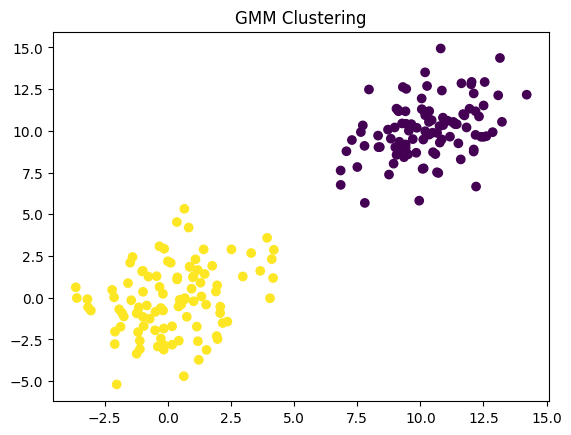

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture

# Generate synthetic data
np.random.seed(0)
X = np.vstack([np.random.multivariate_normal(mean, cov, 100)
               for mean, cov in [([0, 0], [[3, 1], [1, 4]]), ([10, 10], [[3, 1], [1, 3]])]])

# Fit a GMM with 2 components
gmm = GaussianMixture(n_components=2, covariance_type='full')
gmm.fit(X)

# Predict cluster labels
labels = gmm.predict(X)

# Plot the data points with cluster labels
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.title('GMM Clustering')
plt.show()


## Understanding GMM
1. Width (Spread):

* The covariance matrix determines how spread out the data points are around the mean of the Gaussian component.
* Larger values in the covariance matrix indicate that the data points are more spread out, resulting in a wider Gaussian distribution.
2. Orientation:

* The covariance matrix also defines the orientation of the Gaussian component in the feature space.
* The off-diagonal elements of the covariance matrix capture the correlation between different dimensions, which affects the tilt or orientation of the elliptical shape of the Gaussian component.

Means:
 [[ 0.95989087  0.09955544]
 [-0.61874134  0.17056932]]

Covariance Matrices:
 [[[ 0.50880011  0.10607749]
  [ 0.10607749  1.00365185]]

 [[ 0.41351242 -0.06527493]
  [-0.06527493  1.04805912]]]


<ipython-input-5-a1498f78f9d1>:21: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[:, 0], X[:, 1], s=30, cmap='viridis')
<ipython-input-5-a1498f78f9d1>:28: MatplotlibDeprecationWarning: Passing the angle parameter of __init__() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  ellipse = plt.matplotlib.patches.Ellipse(mean, width, height, angle, alpha=0.3)


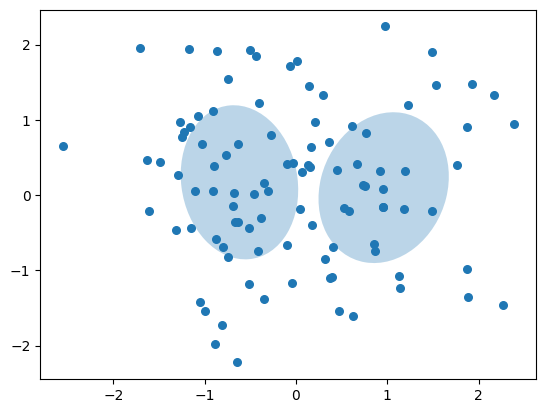

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture

# Example data
np.random.seed(0)
X = np.random.randn(100, 2)

# Fit GMM with 2 components
gmm = GaussianMixture(n_components=2, covariance_type='full').fit(X)

# Extract means and covariance matrices
means = gmm.means_
covariances = gmm.covariances_

print("Means:\n", means)
print("\nCovariance Matrices:\n", covariances)

# Plot the Gaussian components
def plot_gmm(gmm, X):
    plt.scatter(X[:, 0], X[:, 1], s=30, cmap='viridis')
    for mean, cov in zip(gmm.means_, gmm.covariances_):
        eigenvalues, eigenvectors = np.linalg.eigh(cov)
        order = eigenvalues.argsort()[::-1]
        eigenvalues, eigenvectors = eigenvalues[order], eigenvectors[:, order]
        angle = np.degrees(np.arctan2(*eigenvectors[:, 0][::-1]))
        width, height = 2 * np.sqrt(eigenvalues)
        ellipse = plt.matplotlib.patches.Ellipse(mean, width, height, angle, alpha=0.3)
        plt.gca().add_patch(ellipse)
    plt.show()

plot_gmm(gmm, X)

PCA

* Unsupervised Learning: PCA is used to reduce the dimensionality of data, identify patterns, and simplify data visualization and analysis without relying on labeled outputs.
* Supervised Learning: While PCA itself is not a supervised learning technique, it can be used as a preprocessing step in supervised learning tasks to reduce the feature space before applying supervised algorithms.

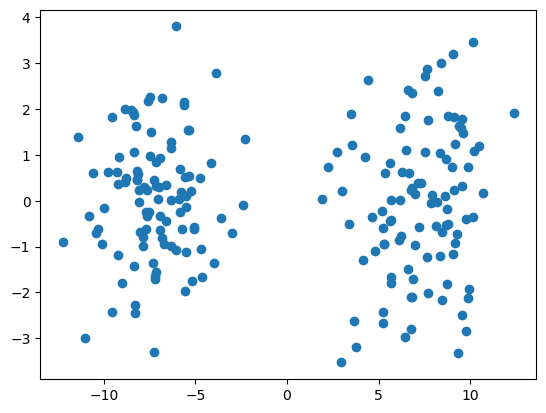

In [ ]:
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt

# Assuming X is the input data matrix

pca = PCA(n_components=2)

X_pca = pca.fit_transform(X)

plt.scatter(X_pca[:, 0], X_pca[:, 1])

plt.show()

### Eigenvalues

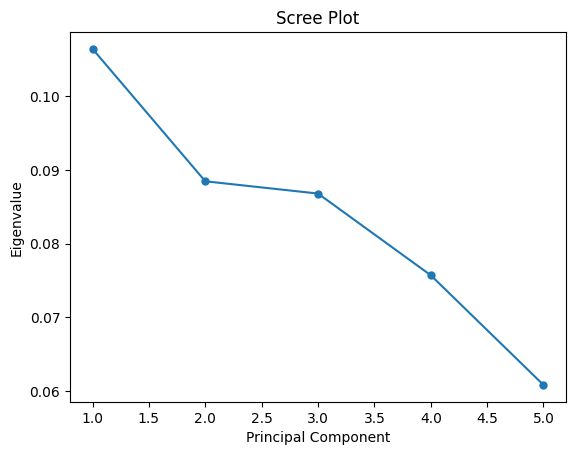

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Example data
X = np.random.rand(100, 5)

# Fit PCA
pca = PCA()
pca.fit(X)

# Eigenvalues (explained variance)
eigenvalues = pca.explained_variance_

# Scree plot
plt.plot(range(1, len(eigenvalues) + 1), eigenvalues, 'o-', markersize=5)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
plt.show()

In [ ]:
from sklearn.decomposition import PCA

import numpy as np

X = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9], [10, 11, 12]])

pca = PCA(n_components=2)

X_pca = pca.fit_transform(X)

print(X_pca)

[[-7.79422863  0.        ]
 [-2.59807621  0.        ]
 [ 2.59807621  0.        ]
 [ 7.79422863 -0.        ]]


* 2 dimensional
* Down from 3
